In [2]:
import os, inspect  # for current directory

import numpy as np
import matplotlib.pyplot as plt
from plot_lib import *


In [3]:
update_settings()
a=6
SMALL_SIZE = 8+a
MEDIUM_SIZE = 10+a
BIGGER_SIZE = 12+a
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

possible_classes = ['c_q', 'c_T', 'q_T']
arch_names = ['CQCNN', 'CNN', 'FC']

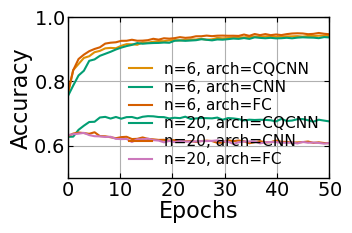

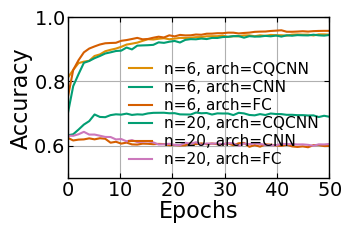

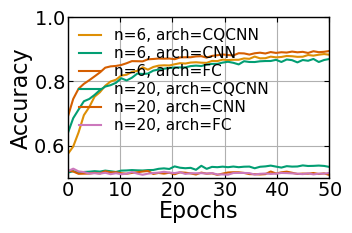

In [39]:
arch = 2

for j, classes in enumerate(possible_classes):
    plt.figure()
    for i, n in enumerate([6, 20]):
        
        for arch in [1,2,3]:
        
            filename = os.path.join('results', 'n_' + str(n) , str(arch) + classes, 'num_nodes_'+ str(n) + '_nettype_' + str(arch) + classes + '_average_'+str(n)+'.npz')

            file = np.load(filename)
            # train_loss, test_accuracy, train_accuracy, test_loss
            train_loss = file['arr_0']
            test_accuracy = file['arr_1']
            train_accuracy = file['arr_2']
            test_loss = file['arr_3']

            plt.ylim(.5, 1.0)
            plt.xticks([0, 10, 20, 30, 40, 50])

            stop = 50
            plt.plot(np.linspace(0.0, stop, stop), test_accuracy[0:stop],'-', label = 'n='+str(n)+', arch='+arch_names[arch-1], color=colors[i+arch])
            #plt.plot(np.linspace(0.0, stop, stop), test_loss[0:stop],'-.', color=colors[i+arch])
            #plt.plot(np.linspace(0.0, stop, stop), train_loss[0:stop],'.', color=colors[i])
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend(fontsize=11)
            plt.grid(True)
    plt.savefig('_nettype_' + str(arch) + classes + '.pdf', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'results/generalisation/linear_/num_nodes_20_nettype_1_test_23__c_q_linear__average_23.npz'

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


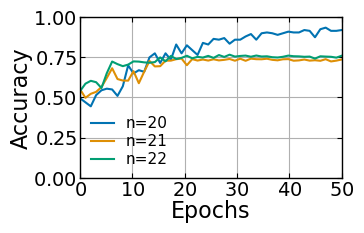

In [4]:
# learn on 6 and test on 6,7,8,9,10
linear_cyclic = 'linear_'


for j in [20]:#, 20]:
    # ------------------------------------------------------------- 
    for arch in [1,2,3]:
        plt.figure(arch)
        for i, test_j in enumerate(range(j,j+3)): 
            name = 'num_nodes_' + str(j) + '_nettype_' + str(arch) + '_test_' + str(test_j) + '__'
            now_testing = name + 'c_q_' + linear_cyclic + '_'
            if test_j == 25:
                name = 'num_nodes_' + str(j) + '_nettype_' + str(arch) + '_test_' + str(test_j)
                now_testing = name + 'c_q_'
            file_place = now_testing + 'average_' + str(test_j) + '.npz'
            
            filename = os.path.join('results', 'generalisation', linear_cyclic, file_place)

            file = np.load(filename)
            # train_loss, test_accuracy, train_accuracy, test_loss
            train_loss = file['arr_0']
            test_accuracy = file['arr_1']
            train_accuracy = file['arr_2']
            test_loss = file['arr_3']
            
            plt.ylim(.0, 1.0)
            plt.xticks([0, 10, 20, 30, 40, 50])

            stop = 50
            plt.plot(np.linspace(0.0, stop, stop), test_accuracy[0:stop],'-', label = 'n='+str(test_j), color=colors[i])
            #plt.plot(np.linspace(0.0, stop, stop), test_loss[0:stop],'-.', color=colors[i])
            #plt.plot(np.linspace(0.0, stop, stop), train_loss[0:stop],'.', color=colors[i])
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend(fontsize=11)
            plt.grid(True)
            
        #plt.savefig(str(j) + '_nettype_' + str(arch) + linear_cyclic + '_test_loss.pdf', bbox_inches='tight')
        plt.savefig(str(j) + '_nettype_' + str(arch) + linear_cyclic + '.pdf', bbox_inches='tight')
